In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import json
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
ngram_data = "../csv_data/ngram_results.csv.gz"

In [3]:
ngram_df = pd.read_csv(ngram_data)
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str
0,78736,"[[Barbara, great, host, stayed, three, months,...","[[Barbara great, great host, stayed three, thr..."
1,78705,"[[space, extremely, clean, well, taken, care, ...","[[space extremely, extremely clean, clean well..."
2,78752,"[[Stephanie, perfect, hostess, always, prompt,...","[[Stephanie perfect, perfect hostess, always p..."
3,78734,"[[Pictures, don't, place, justice, rooms, nice...","[[Pictures don't, don't place, place justice, ..."
4,78729,"[[stayed, location, two, nights, could, deligh...","[[stayed location, location two, two nights, n..."


In [4]:
# remove extraneous characters
# convert bigrams to 'unigram' for word cloud
ngram_df["unigram_list_str"] = ngram_df["unigram_list_str"].str.lower().str.replace("[","")\
                                                           .str.replace("]","").str.replace("&","")\
                                                           .str.replace(" ","").str.replace(", ",",")
                                                            
ngram_df["bigram_list_str"] = ngram_df["bigram_list_str"].str.lower().str.replace("[","")\
                                                         .str.replace("]","").str.replace("&","")\
                                                         .str.replace(", ",",").str.replace(" ","_")

In [5]:
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str
0,78736,"barbara,great,host,stayed,three,months,summer,...","barbara_great,great_host,stayed_three,three_mo..."
1,78705,"space,extremely,clean,well,taken,care,great,ne...","space_extremely,extremely_clean,clean_well,wel..."
2,78752,"stephanie,perfect,hostess,always,prompt,reply,...","stephanie_perfect,perfect_hostess,always_promp..."
3,78734,"pictures,don't,place,justice,rooms,nicer,bigge...","pictures_don't,don't_place,place_justice,rooms..."
4,78729,"stayed,location,two,nights,could,delighted,us,...","stayed_location,location_two,two_nights,nights..."


In [6]:
# define stopwords to remove in word cloud
stopwords = set(STOPWORDS)
unigram_stopwords = ["clean", "nice", "perfect", "austin", "great", "place", "stay", "definitely", 
                     "would", "host", "house", "location", "home", "beautiful", "highly", "recommend",
                     "comfortable", "space", "would", "us", "everything", "'s", "bed", "amazing",
                     "room", "apartment"]
bigram_stopwords = ["would_recommend", "definitely_recommend", "highly_recommend", "great_place", 
                    "great_stay", "great_host", "would_definitely", "definitely_stay", "place_stay", 
                    "great_location", "would_stay", "place_great", "location_great", "highly_recommended",
                    "clean_comfortable", "within_walking", "walking_distance", "stay_austin",
                    "house_clean", "place_clean", "recommend_staying", "everything_needed",
                    "would_highly", "recommend_place", "made_us", "us_feel", "nice_place"]
stopwords.update(unigram_stopwords)
stopwords.update(bigram_stopwords)

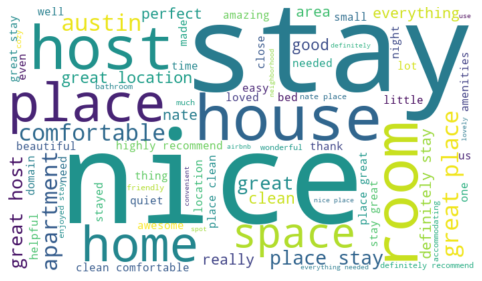

In [41]:
# word cloud example before excluding stopwords
test_text = ngram_df.unigram_list_str[10]
wordcloud = WordCloud(background_color="white", max_words=75, 
                      width=700, height=400).generate(test_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

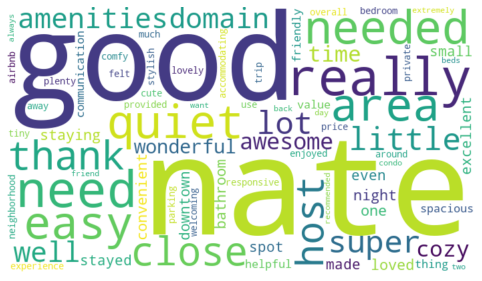

In [39]:
# word cloud example after excluding stopwords
test_text = ngram_df.unigram_list_str[10]
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=75, 
                      width=700, height=400).generate(test_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [42]:
for idx in range(ngram_df.shape[0]):
    filename = ngram_df.zipcode[idx]
    text = ngram_df.unigram_list_str[idx]
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=75, 
                          width=700, height=400).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    # plt.show()
    plt.savefig("../static/images/word_clouds/unigrams/unigram_" + str(filename) + ".png", dpi=100)
    plt.close()

In [43]:
for idx in range(ngram_df.shape[0]):
    filename = ngram_df.zipcode[idx]
    text = ngram_df.bigram_list_str[idx]
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50,
                          width=700, height=400).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    # plt.show()
    plt.savefig("../static/images/word_clouds/bigrams/bigram_" + str(filename) + ".png", dpi=100)
    plt.close()

In [44]:
for word in unigram_stopwords:
    ngram_df["unigram_list_str"] = ngram_df["unigram_list_str"].str.replace(word,"")
    
for word in bigram_stopwords:
    ngram_df["bigram_list_str"] = ngram_df["bigram_list_str"].str.replace(word,"")

In [45]:
ngram_df["unigram_list"] = ngram_df["unigram_list_str"].str.split(",")
ngram_df["bigram_list"] = ngram_df["bigram_list_str"].str.split(",")

ngram_df["unigram_count"] = ngram_df["unigram_list"].apply(Counter)
ngram_df["bigram_count"] = ngram_df["bigram_list"].apply(Counter)

In [46]:
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str,unigram_list,bigram_list,unigram_count,bigram_count
0,78736,"barbara,,,ed,three,months,summer,,thoroughly,e...","barbara_great,,stayed_three,three_months,month...","[barbara, , , ed, three, months, summer, , tho...","[barbara_great, , stayed_three, three_months, ...","{'barbara': 2, '': 8014, 'ed': 155, 'three': 1...","{'barbara_great': 1, '': 1184, 'stayed_three':..."
1,78705,",extremely,,well,taken,care,,neighborhood,,,,t...","space_extremely,extremely_clean,clean_well,wel...","[, extremely, , well, taken, care, , neighborh...","[space_extremely, extremely_clean, clean_well,...","{'': 56362, 'extremely': 366, 'well': 1116, 't...","{'space_extremely': 2, 'extremely_clean': 45, ..."
2,78752,"stephanie,,ess,always,prompt,reply,friendly,th...","stephanie_perfect,perfect_hostess,always_promp...","[stephanie, , ess, always, prompt, reply, frie...","[stephanie_perfect, perfect_hostess, always_pr...","{'stephanie': 19, '': 17830, 'ess': 38, 'alway...","{'stephanie_perfect': 1, 'perfect_hostess': 3,..."
3,78734,"pictures,don't,,jtice,s,r,bigger,pictures,make...","pictures_don't,don't_place,place_justice,rooms...","[pictures, don't, , jtice, s, r, bigger, pictu...","[pictures_don't, don't_place, place_justice, r...","{'pictures': 165, 'don't': 73, '': 25200, 'jti...","{'pictures_don't': 11, 'don't_place': 3, 'plac..."
4,78729,"ed,,two,nights,could,delighted,,thought,,,imma...","stayed_location,location_two,two_nights,nights...","[ed, , two, nights, could, delighted, , though...","[stayed_location, location_two, two_nights, ni...","{'ed': 222, '': 11159, 'two': 56, 'nights': 35...","{'stayed_location': 1, 'location_two': 1, 'two..."


In [47]:
def top_10_words(row):
    del row['']
    del row['s']
    return sorted(row.items(), key=operator.itemgetter(1), reverse=True)[:10]

In [48]:
ngram_df["unigram_top10"] = ngram_df["unigram_count"].apply(top_10_words)
ngram_df["bigram_top10"] = ngram_df["bigram_count"].apply(top_10_words)

In [49]:
# only care about these columns
ngram_top10_df = ngram_df[["zipcode", "unigram_top10", "bigram_top10"]]
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str,unigram_list,bigram_list,unigram_count,bigram_count,unigram_top10,bigram_top10
0,78736,"barbara,,,ed,three,months,summer,,thoroughly,e...","barbara_great,,stayed_three,three_months,month...","[barbara, , , ed, three, months, summer, , tho...","[barbara_great, , stayed_three, three_months, ...","{'barbara': 2, 'ed': 155, 'three': 19, 'months...","{'barbara_great': 1, 'stayed_three': 5, 'three...","[(time, 265), (back, 230), (quiet, 221), (love...","[(john_vivien, 100), (hill_country, 82), (brit..."
1,78705,",extremely,,well,taken,care,,neighborhood,,,,t...","space_extremely,extremely_clean,clean_well,wel...","[, extremely, , well, taken, care, , neighborh...","[space_extremely, extremely_clean, clean_well,...","{'extremely': 366, 'well': 1116, 'taken': 44, ...","{'space_extremely': 2, 'extremely_clean': 45, ...","[(easy, 1606), (close, 1578), (good, 1476), (t...","[(ut_campus, 338), (quick_respond, 281), (good..."
2,78752,"stephanie,,ess,always,prompt,reply,friendly,th...","stephanie_perfect,perfect_hostess,always_promp...","[stephanie, , ess, always, prompt, reply, frie...","[stephanie_perfect, perfect_hostess, always_pr...","{'stephanie': 19, 'ess': 38, 'always': 114, 'p...","{'stephanie_perfect': 1, 'perfect_hostess': 3,...","[(chalu, 529), (easy, 434), (time, 431), (ing,...","[(quiet_neighborhood, 104), (enjoyed_stay, 97)..."
3,78734,"pictures,don't,,jtice,s,r,bigger,pictures,make...","pictures_don't,don't_place,place_justice,rooms...","[pictures, don't, , jtice, s, r, bigger, pictu...","[pictures_don't, don't_place, place_justice, r...","{'pictures': 165, 'don't': 73, 'jtice': 71, 'r...","{'pictures_don't': 11, 'don't_place': 3, 'plac...","[(lake, 1509), (time, 784), (back, 689), (view...","[(lake_travis, 536), (great_time, 185), (enjoy..."
4,78729,"ed,,two,nights,could,delighted,,thought,,,imma...","stayed_location,location_two,two_nights,nights...","[ed, , two, nights, could, delighted, , though...","[stayed_location, location_two, two_nights, ni...","{'ed': 222, 'two': 56, 'nights': 35, 'could': ...","{'stayed_location': 1, 'location_two': 1, 'two...","[(quiet, 332), (ing, 276), (time, 266), (neigh...","[(enjoyed_stay, 82), (quiet_neighborhood, 78),..."


In [195]:
def unigram_word_dict(row):
    new_dict = {}
    words_lst = []
    words_cnt = []
    
    for x in row["unigram_top10"]:
        words_lst.append(x[0])
        words_cnt.append(x[1])
        
    new_dict[str(row["zipcode"])] = {
                                      'unigram_words' : words_lst,
                                      'unigram_count' : words_cnt
                                    }
    return new_dict

def bigram_word_dict(row):
    new_dict = {}
    words_lst = []
    words_cnt = []
    
    for x in row["bigram_top10"]:
        words_lst.append(x[0])
        words_cnt.append(x[1])
        
    new_dict[str(row["zipcode"])] = {
                                      'bigram_words' : words_lst,
                                      'bigram_count' : words_cnt
                                    }
    return new_dict

# def word_dict(row, **kwargs):
#     if col_type == 0:
#         col = 'unigram'
#     else:
#         col='bigram'   
    
#     new_dict = {}
#     words_lst = []
#     words_cnt = []
    
#     for x in row[col + "_top10"]:
#         words_lst.append(x[0])
#         words_cnt.append(x[1])
        
#     new_dict[str(row["zipcode"])] = {
#                                       col + '_words' : words_lst,
#                                       col + '_count' : word_cnt
#                                     }
#     return new_dict

In [196]:
ngram_top10_df["unigram_dict"] = ngram_top10_df.apply(unigram_word_dict, axis=1)
ngram_top10_df["bigram_dict"] = ngram_top10_df.apply(bigram_word_dict, axis=1)
# ngram_top10_df.apply(word_dict, col_type=1, axis=1)

/Users/utbootcamp/.conda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/utbootcamp/.conda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [127]:
ngram_top10_df.head()

,zipcode,unigram_top10,bigram_top10,unigram_dict,bigram_dict
0,78736,"[(time, 265), (back, 230), (quiet, 221), (love...","[(john_vivien, 100), (hill_country, 82), (brit...","{'78736': {'unigram_words': ['time', 'back', '...","{'78736': {'bigram_words': ['john_vivien', 'hi..."
1,78705,"[(easy, 1606), (close, 1578), (good, 1476), (t...","[(ut_campus, 338), (quick_respond, 281), (good...","{'78705': {'unigram_words': ['easy', 'close', ...","{'78705': {'bigram_words': ['ut_campus', 'quic..."
2,78752,"[(chalu, 529), (easy, 434), (time, 431), (ing,...","[(quiet_neighborhood, 104), (enjoyed_stay, 97)...","{'78752': {'unigram_words': ['chalu', 'easy', ...",{'78752': {'bigram_words': ['quiet_neighborhoo...
3,78734,"[(lake, 1509), (time, 784), (back, 689), (view...","[(lake_travis, 536), (great_time, 185), (enjoy...","{'78734': {'unigram_words': ['lake', 'time', '...","{'78734': {'bigram_words': ['lake_travis', 'gr..."
4,78729,"[(quiet, 332), (ing, 276), (time, 266), (neigh...","[(enjoyed_stay, 82), (quiet_neighborhood, 78),...","{'78729': {'unigram_words': ['quiet', 'ing', '...","{'78729': {'bigram_words': ['enjoyed_stay', 'q..."


In [ ]:
# save off to view as csv table for reference
ngram_top10_df.to_csv("../static/data/top_words_by_zipcode.csv", index=False)

## Convert and save to json files

In [128]:
# example of how to access each zipcode dictionary entry
ngram_top10_df["unigram_dict"][0]

{'78736': {'unigram_words': ['time',
   'back',
   'quiet',
   'loved',
   'wonderful',
   'john',
   'casita',
   'meum',
   'andrea',
   'area'],
  'unigram_count': [265, 230, 221, 203, 198, 193, 192, 189, 187, 181]}}

In [135]:
# example of how to access elements within zipcode dictionary
list(ngram_top10_df["unigram_dict"].values)[0]['78736']

{'unigram_words': ['time',
  'back',
  'quiet',
  'loved',
  'wonderful',
  'john',
  'casita',
  'meum',
  'andrea',
  'area'],
 'unigram_count': [265, 230, 221, 203, 198, 193, 192, 189, 187, 181]}

In [198]:
uni_dict_lst = list(ngram_top10_df["unigram_dict"].values)
bi_dict_lst  = list(ngram_top10_df["bigram_dict"].values)

In [199]:
uni_dict = {}
for x in uni_dict_lst:
    key = list(x.keys())[0]
    value = list(x.values())[0]
    uni_dict[key] = value

In [200]:
bi_dict = {}
for x in bi_dict_lst:
    key = list(x.keys())[0]
    value = list(x.values())[0]
    bi_dict[key] = value

In [201]:
filename = '../static/data/unigram.json'
with open(filename, 'w') as f:
        json.dump(uni_dict, f)

In [202]:
filename = '../static/data/bigram.json'
with open(filename, 'w') as f:
        json.dump(bi_dict, f)